# Importar librerías necesarias

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings(action="ignore")

# Cargar el dataset

In [2]:
file_path = "CC GENERAL.csv"
df = pd.read_csv(file_path)

print(df.shape)
df.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Limpieza de datos

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### 1. Verificar valores nulos en el dataset

In [5]:
print("Valores nulos en cada columna:")
print(df.isnull().sum())

Valores nulos en cada columna:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


### 2. Completando los valores nulos con el valor medio.

Cuando un dataset tiene pocos valores faltantes (NaN/missing values) en una columna, generalmente se justifica imputarlos (rellenarlos) en lugar de eliminarlos

In [6]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

In [7]:
print(df.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


### 3. Detección de valores duplicados

In [8]:
print(f"\nCantidad de filas duplicadas: {df.duplicated().sum()}")


Cantidad de filas duplicadas: 0


### Eliminación de variables

La primera etapa consiste en eliminar las variables que no son necesarias para el proceso de agrupamiento. En este caso, se eliminará CUST_ID porque contiene valores únicos.

In [9]:
df.drop('CUST_ID', axis=1, inplace = True)

### 4. Eliminación de datos faltantes y atípicos (outliers)

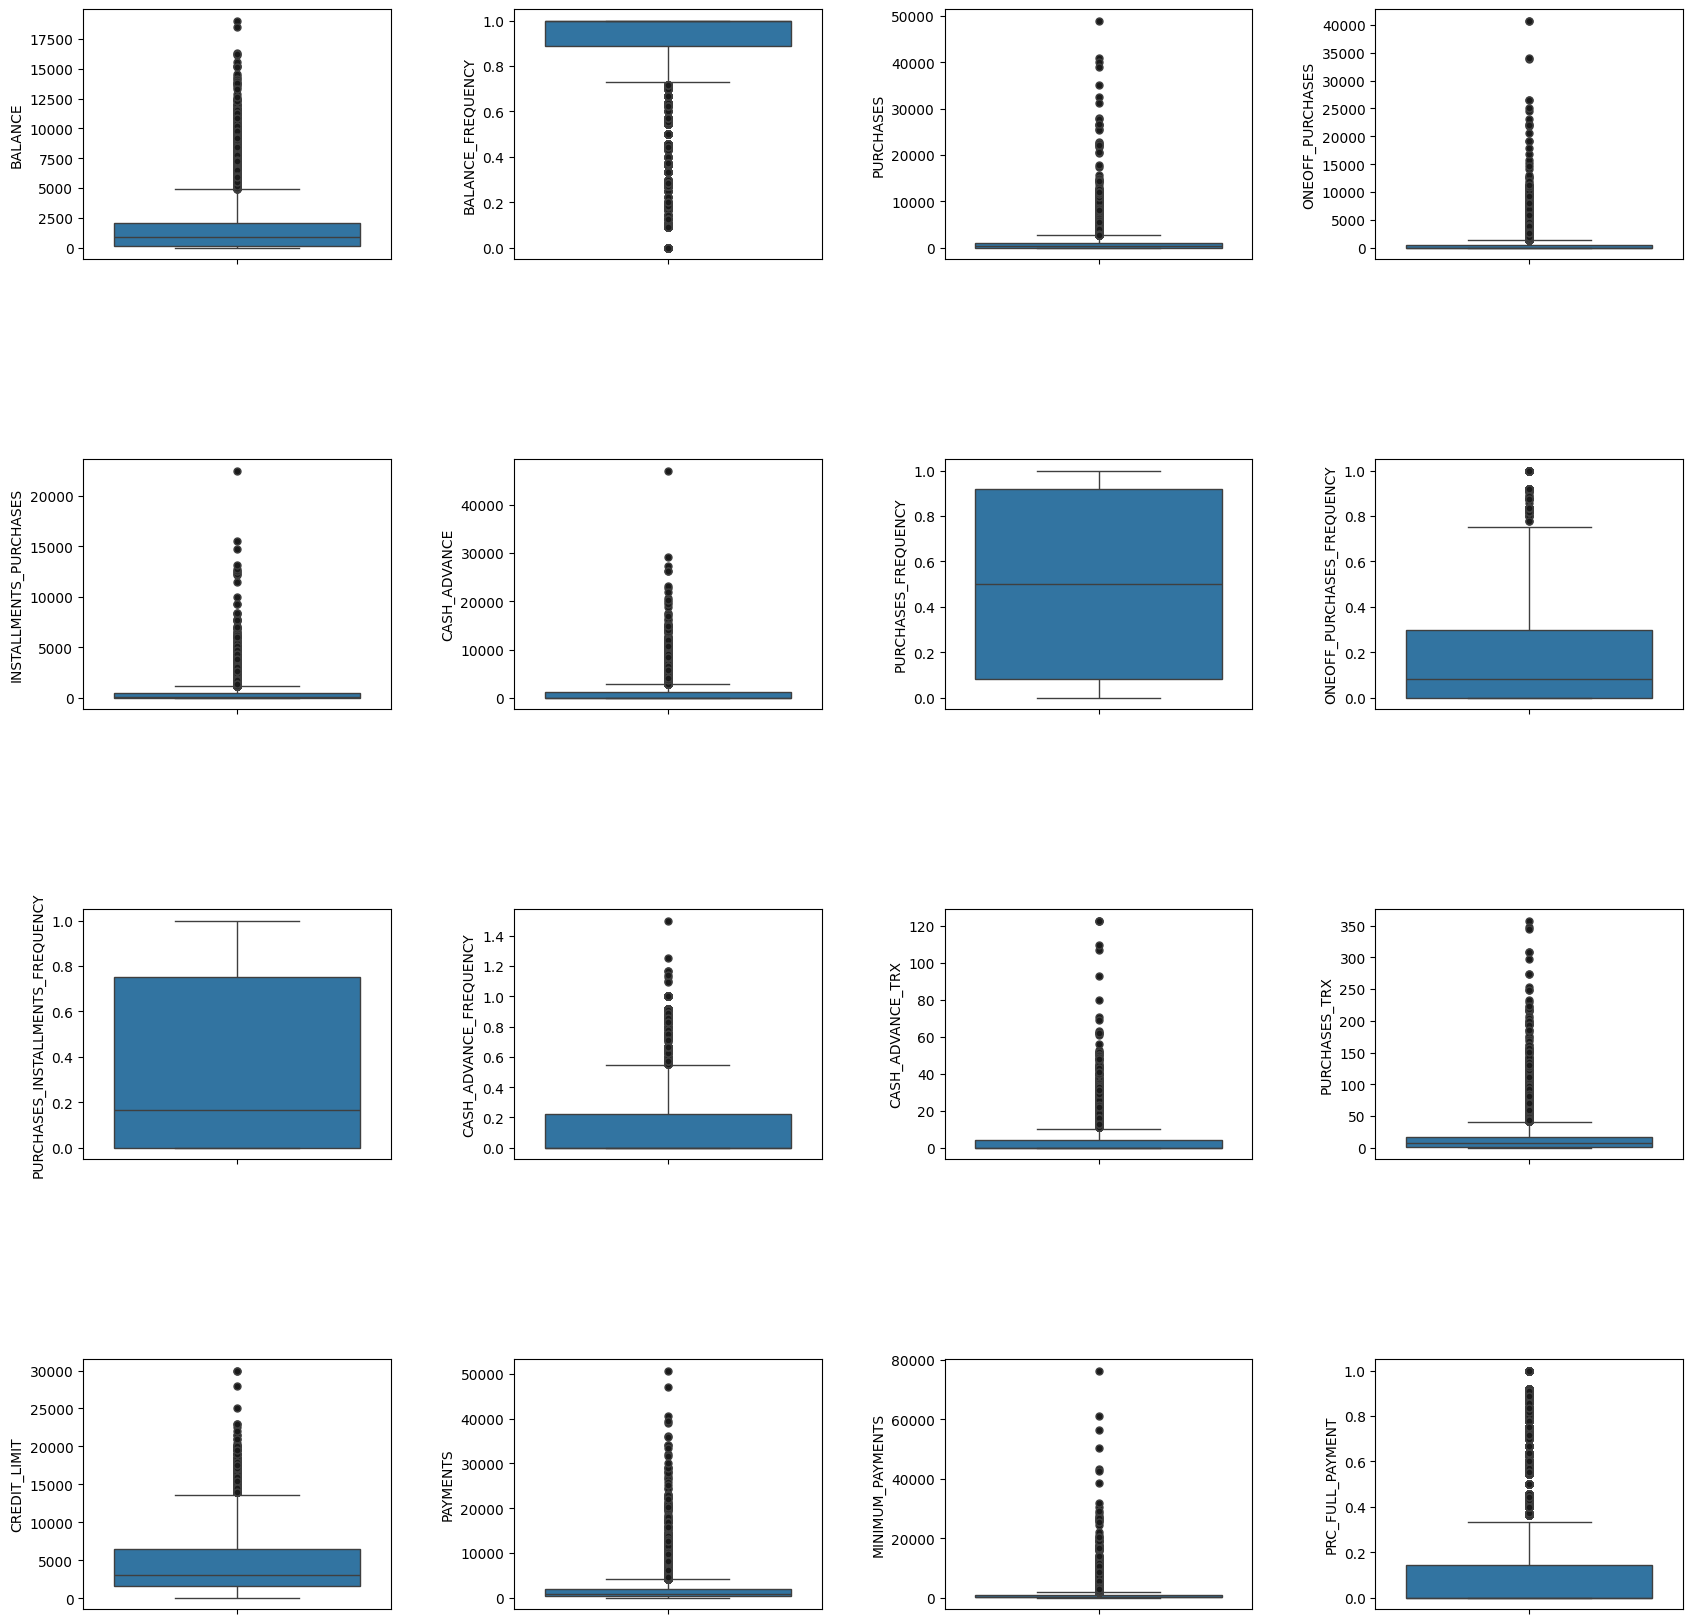

In [10]:
plt.subplots(nrows=4 , ncols=4 , figsize=(20,20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

for i in range (len(df.columns)-1):
    
    plt.subplot(4,4,i+1)
    sns.boxplot(df[df.columns[i]], flierprops = dict(markerfacecolor = '0.10', markersize = 5))

### Encontrar valores atípicos según el rango intercuantílico

In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

count_out = df[(df <  (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))].count()


df_count_out = pd.DataFrame(count_out, columns=['conteo_outliers'])
df_count_out

,conteo_outliers
BALANCE,695
BALANCE_FREQUENCY,1493
PURCHASES,808
ONEOFF_PURCHASES,1013
INSTALLMENTS_PURCHASES,867
CASH_ADVANCE,1030
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,782
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,525


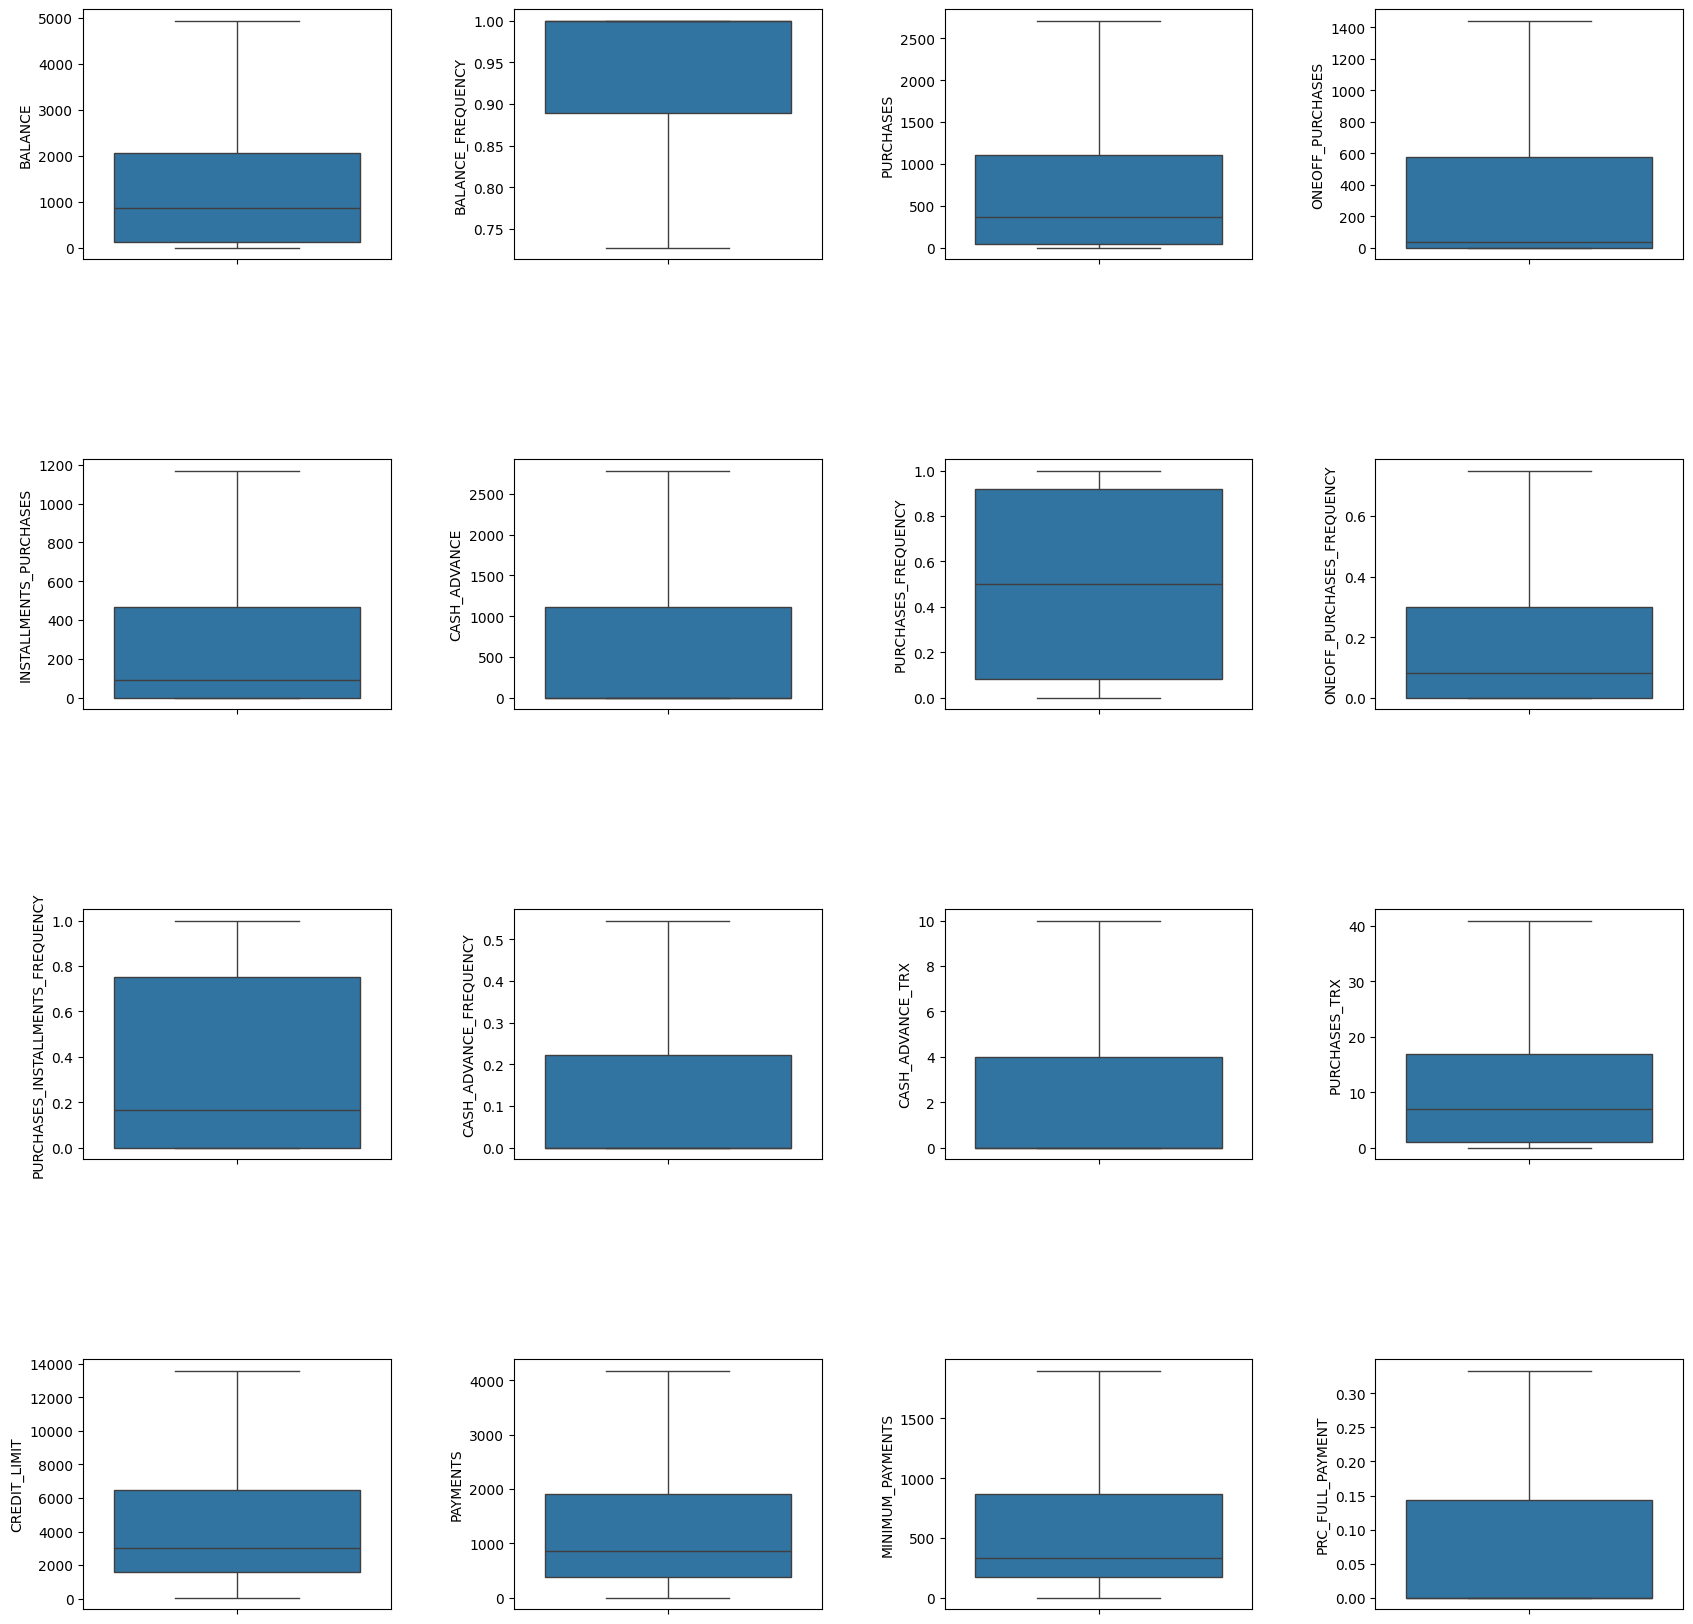

In [12]:
plt.subplots(nrows=4 , ncols=4 , figsize=(20,20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

for i in range (len(df.columns)-1):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[df.columns[i]],showfliers = False)

Según el criterio aplicado, hay muchos datos atípicos, pero su eliminación no es aconsejable. Deben usarse estrategias diferentes para gestionarlos.

# ANÁLISIS EXPLORATORIO DE DATOS (EDA)

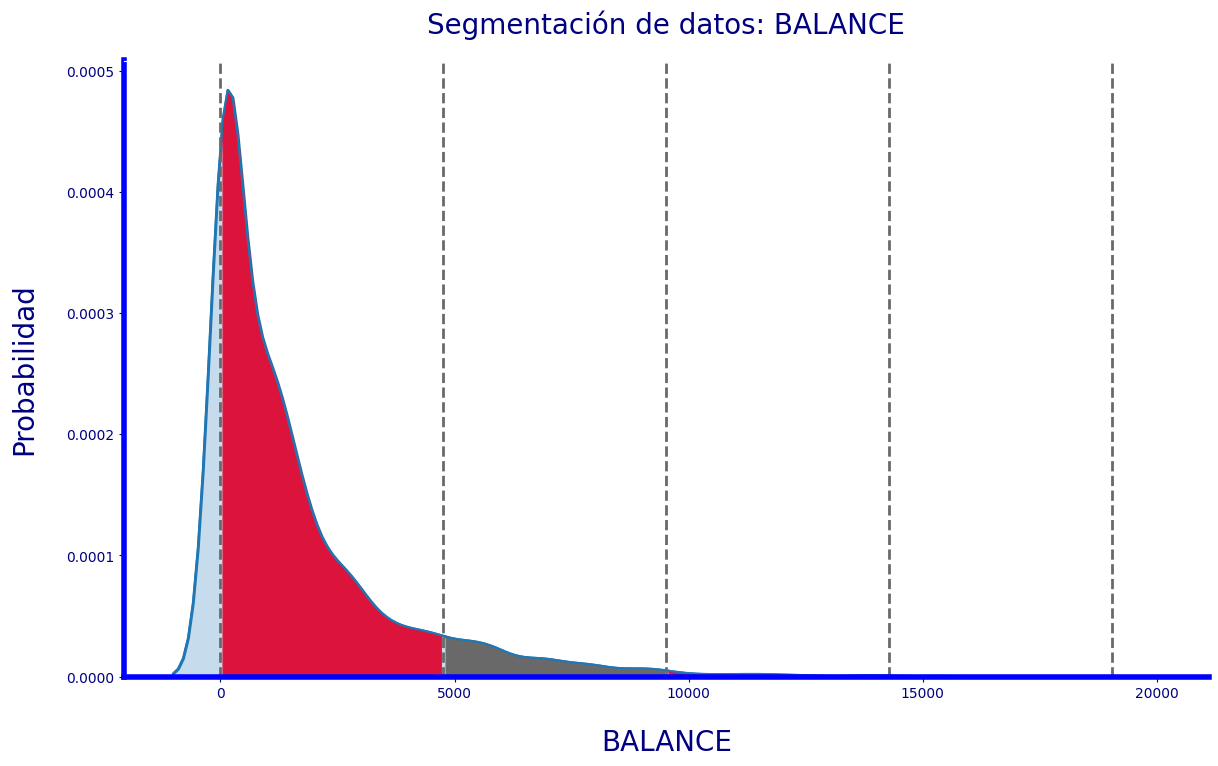



 Área bajo la curva de BALANCE entre 0.0 y 4760.8: 0.7435
 Área bajo la curva de BALANCE entre 4760.8 y 9521.6: 0.0731
 Área bajo la curva de BALANCE entre 9521.6 y 14282.4: 0.0078
 Área bajo la curva de BALANCE entre 14282.4 y 19043.1: 0.0012







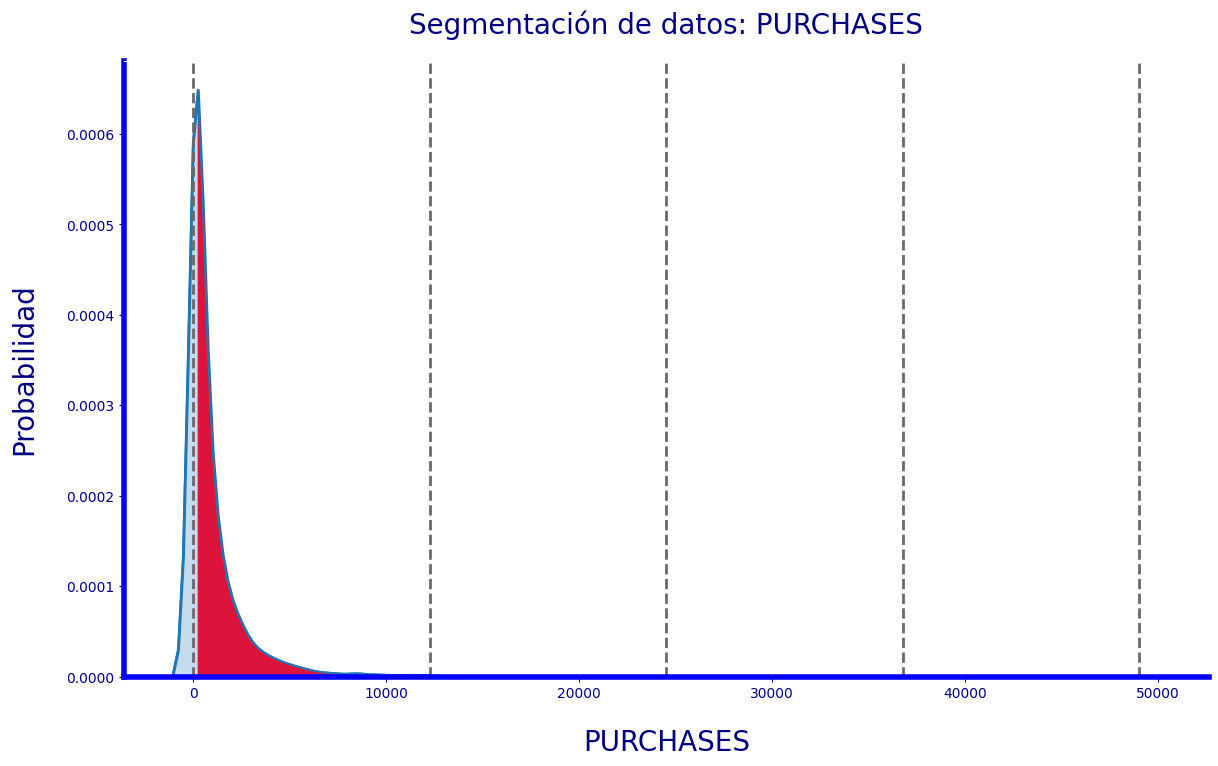



 Área bajo la curva de PURCHASES entre 0.0 y 12259.9: 0.6271
 Área bajo la curva de PURCHASES entre 12259.9 y 24519.8: 0.0029
 Área bajo la curva de PURCHASES entre 24519.8 y 36779.7: 0.0011
 Área bajo la curva de PURCHASES entre 36779.7 y 49039.6: 0.0004







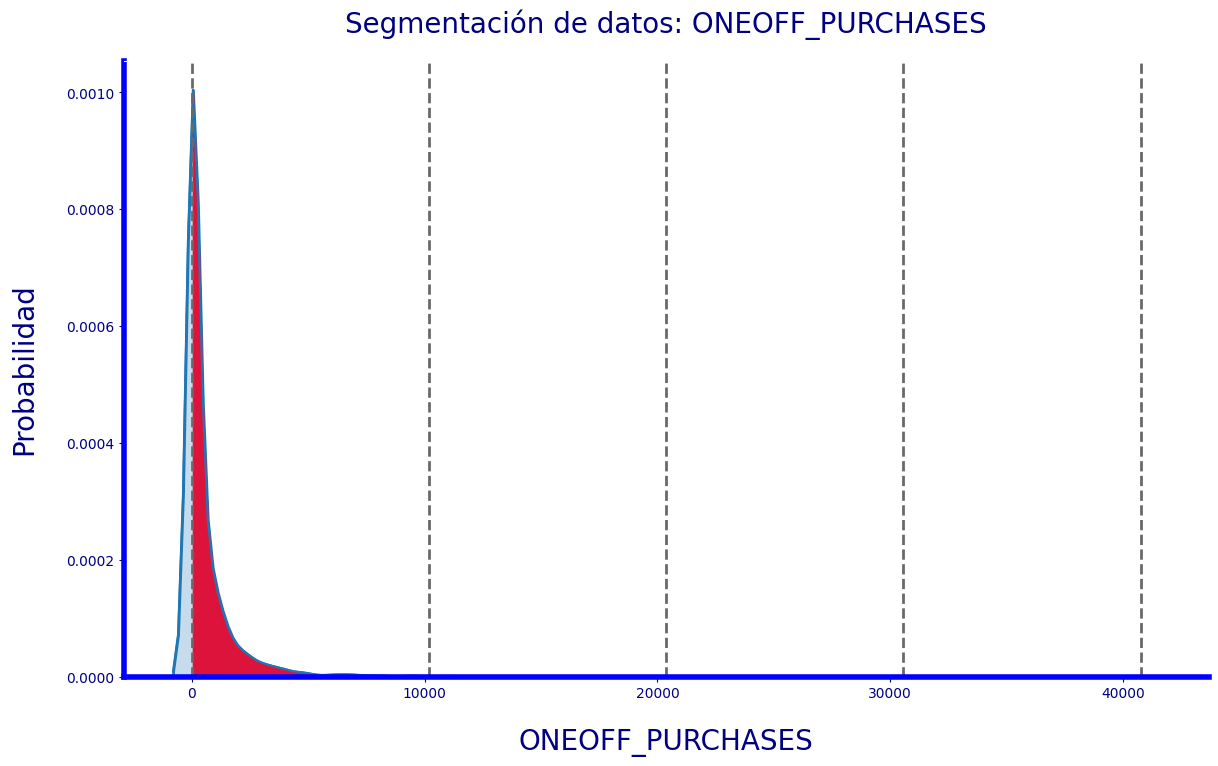



 Área bajo la curva de ONEOFF_PURCHASES entre 0.0 y 10190.3: 0.6463
 Área bajo la curva de ONEOFF_PURCHASES entre 10190.3 y 20380.6: 0.0027
 Área bajo la curva de ONEOFF_PURCHASES entre 20380.6 y 30570.9: 0.0010
 Área bajo la curva de ONEOFF_PURCHASES entre 30570.9 y 40761.2: 0.0003







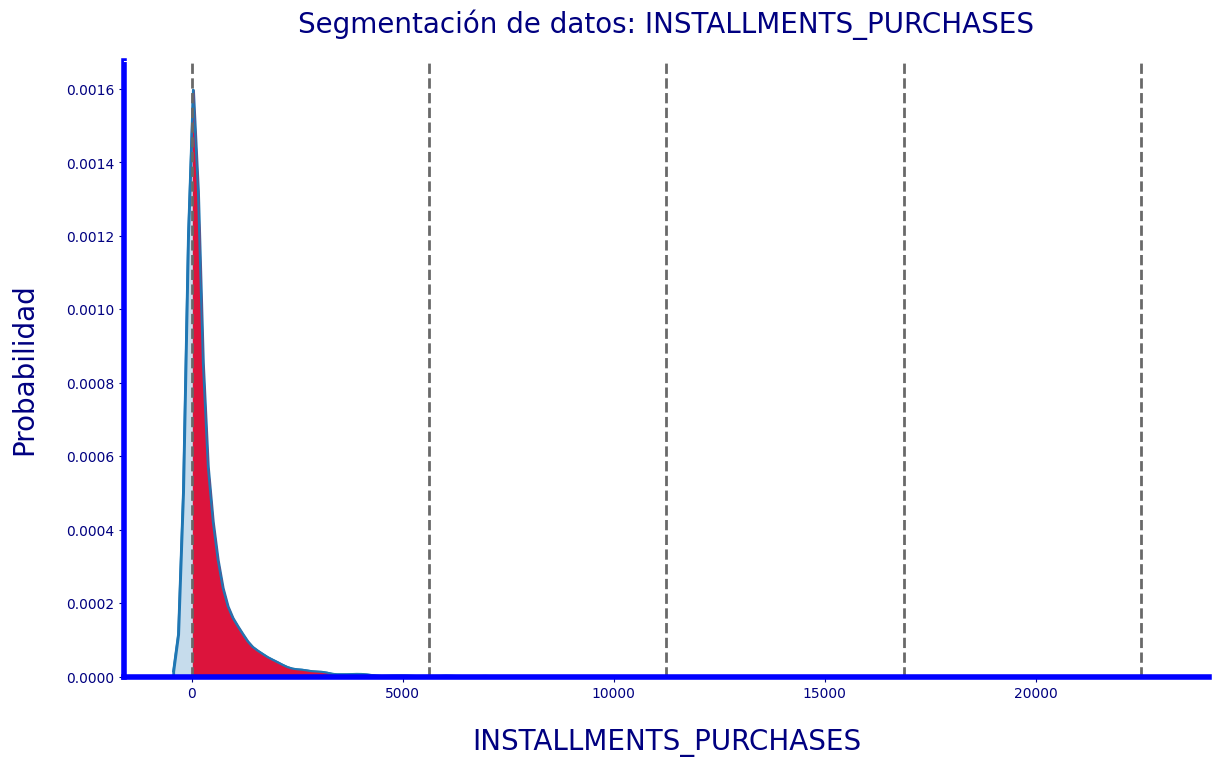



 Área bajo la curva de INSTALLMENTS_PURCHASES entre 0.0 y 5625.0: 0.6861
 Área bajo la curva de INSTALLMENTS_PURCHASES entre 5625.0 y 11250.0: 0.0035
 Área bajo la curva de INSTALLMENTS_PURCHASES entre 11250.0 y 16875.0: 0.0011
 Área bajo la curva de INSTALLMENTS_PURCHASES entre 16875.0 y 22500.0: 0.0000







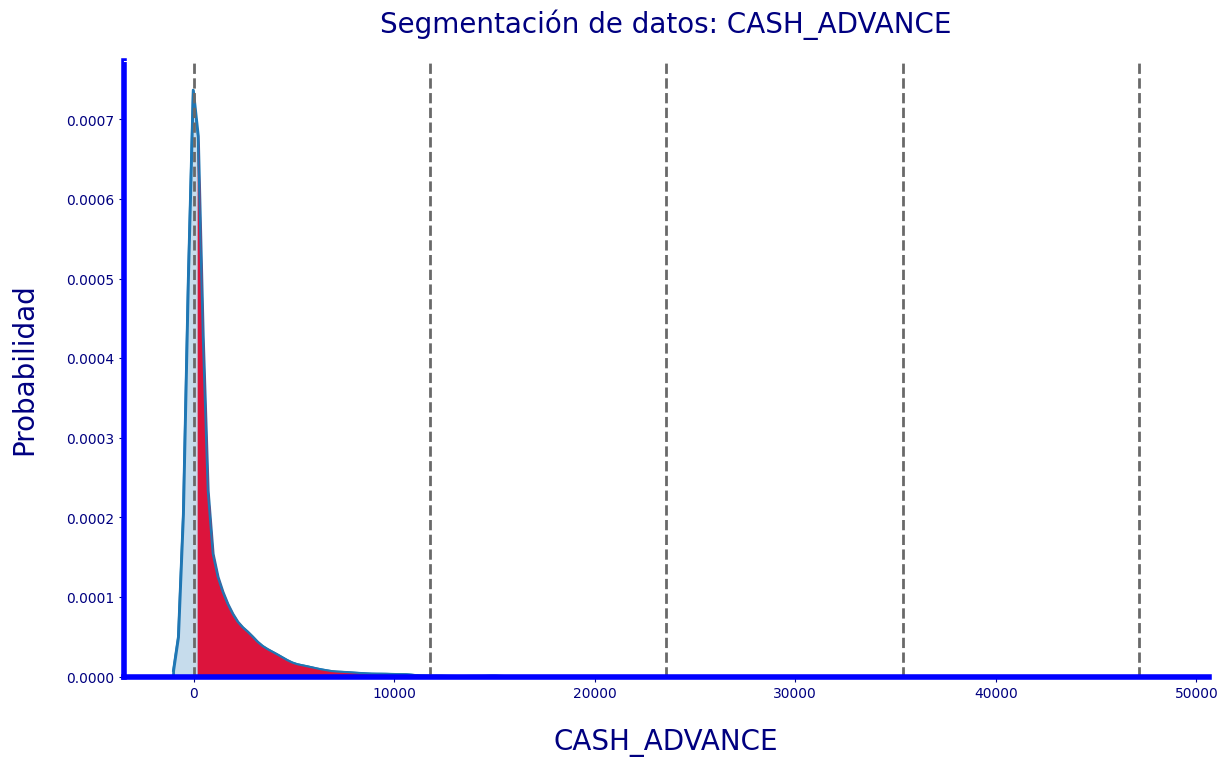



 Área bajo la curva de CASH_ADVANCE entre 0.0 y 11784.3: 0.5409
 Área bajo la curva de CASH_ADVANCE entre 11784.3 y 23568.6: 0.0044
 Área bajo la curva de CASH_ADVANCE entre 23568.6 y 35352.9: 0.0005
 Área bajo la curva de CASH_ADVANCE entre 35352.9 y 47137.2: 0.0000







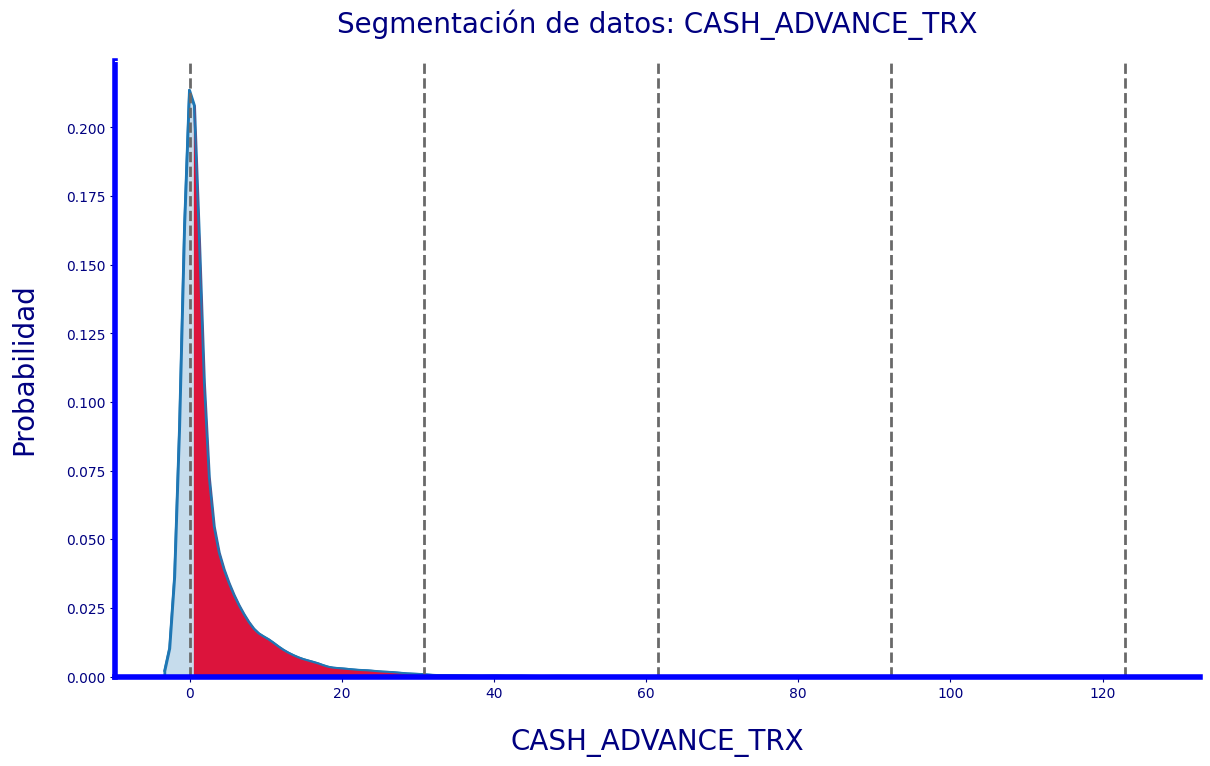



 Área bajo la curva de CASH_ADVANCE_TRX entre 0.0 y 30.8: 0.5861
 Área bajo la curva de CASH_ADVANCE_TRX entre 30.8 y 61.5: 0.0070
 Área bajo la curva de CASH_ADVANCE_TRX entre 61.5 y 92.2: 0.0007
 Área bajo la curva de CASH_ADVANCE_TRX entre 92.2 y 123.0: 0.0004







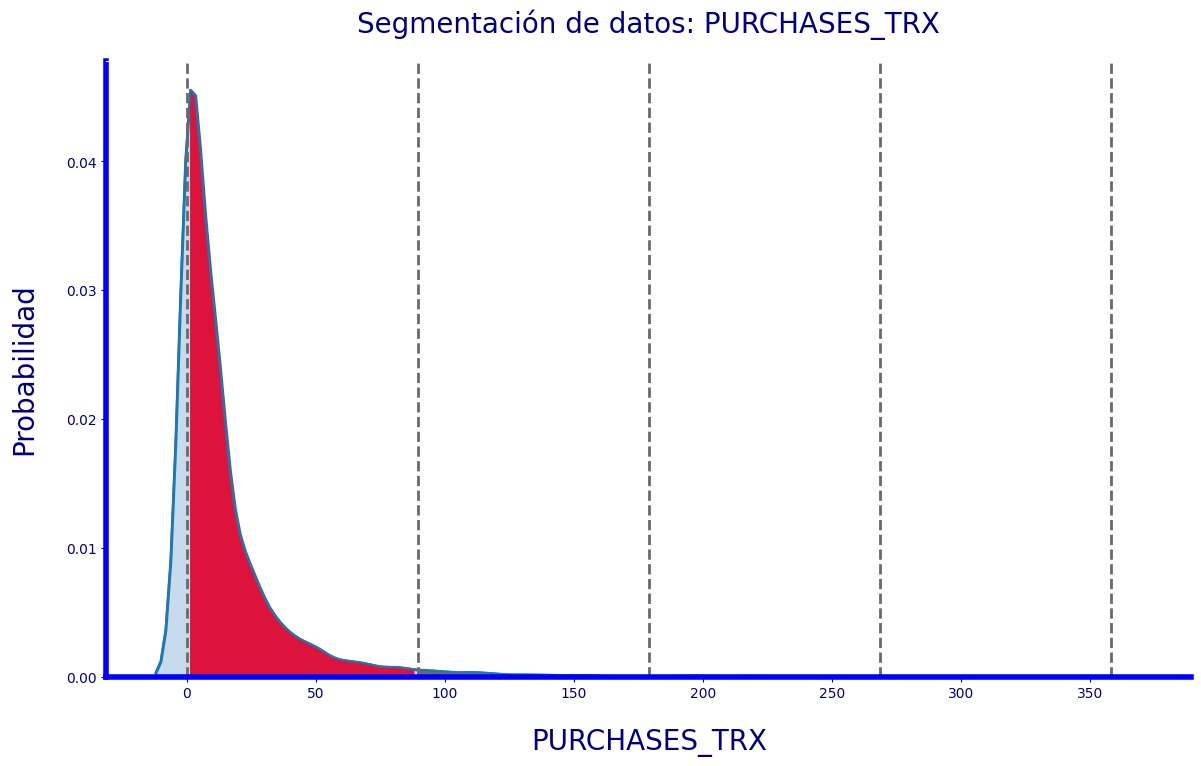



 Área bajo la curva de PURCHASES_TRX entre 0.0 y 89.5: 0.7392
 Área bajo la curva de PURCHASES_TRX entre 89.5 y 179.0: 0.0169
 Área bajo la curva de PURCHASES_TRX entre 179.0 y 268.5: 0.0026
 Área bajo la curva de PURCHASES_TRX entre 268.5 y 358.0: 0.0008







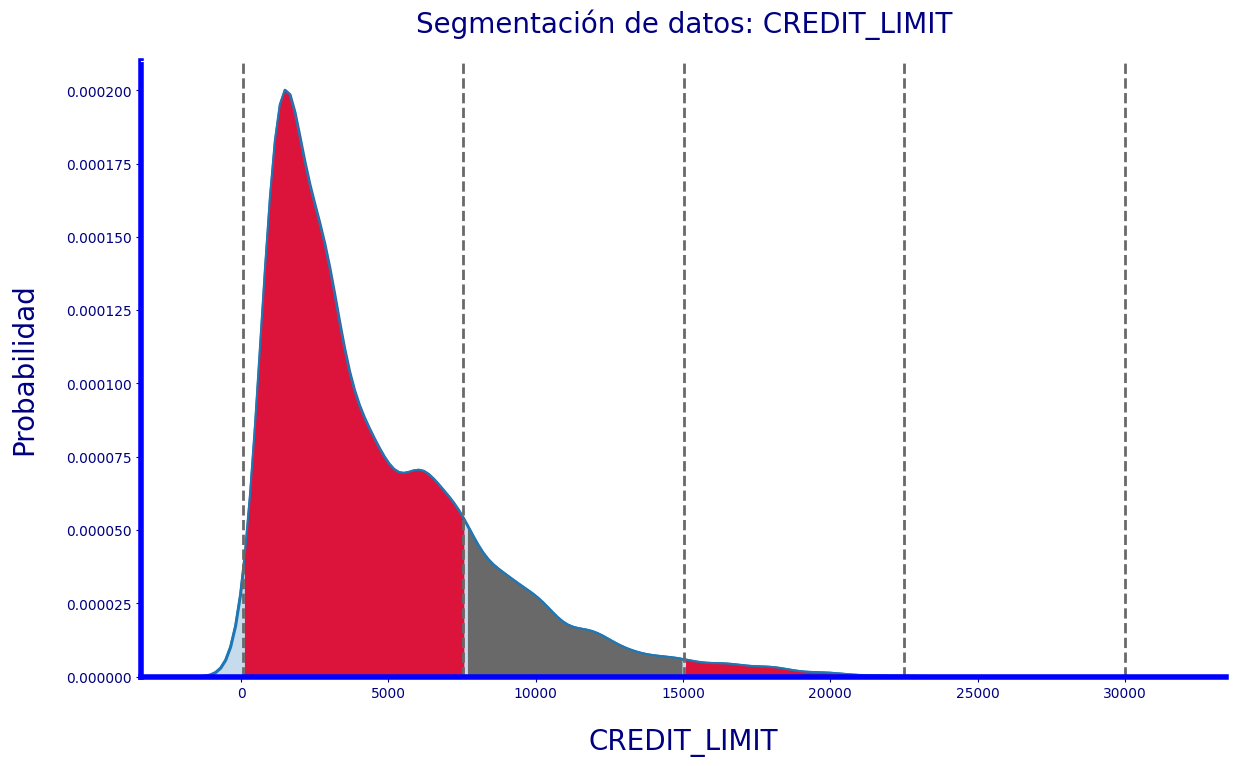



 Área bajo la curva de CREDIT_LIMIT entre 50.0 y 7537.5: 0.8055
 Área bajo la curva de CREDIT_LIMIT entre 7537.5 y 15025.0: 0.1512
 Área bajo la curva de CREDIT_LIMIT entre 15025.0 y 22512.5: 0.0179
 Área bajo la curva de CREDIT_LIMIT entre 22512.5 y 30000.0: 0.0006







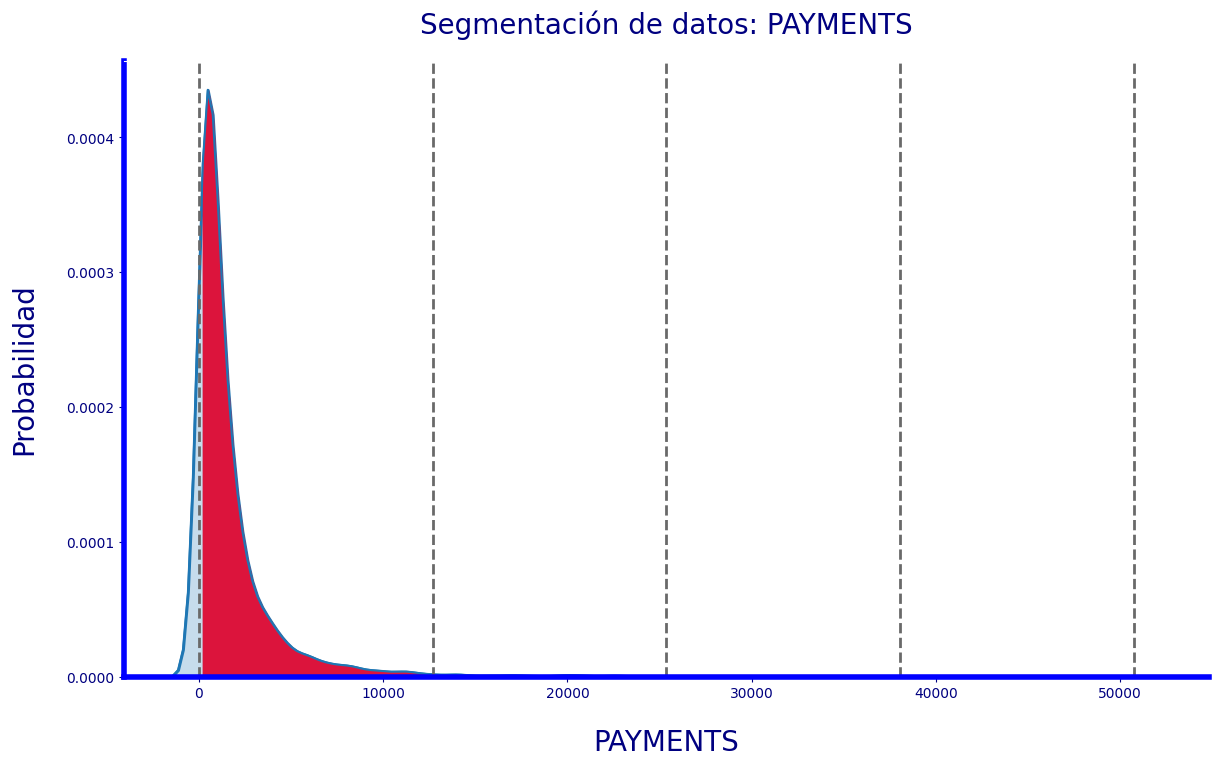



 Área bajo la curva de PAYMENTS entre 0.0 y 12680.4: 0.8019
 Área bajo la curva de PAYMENTS entre 12680.4 y 25360.7: 0.0083
 Área bajo la curva de PAYMENTS entre 25360.7 y 38041.1: 0.0020
 Área bajo la curva de PAYMENTS entre 38041.1 y 50721.5: 0.0005







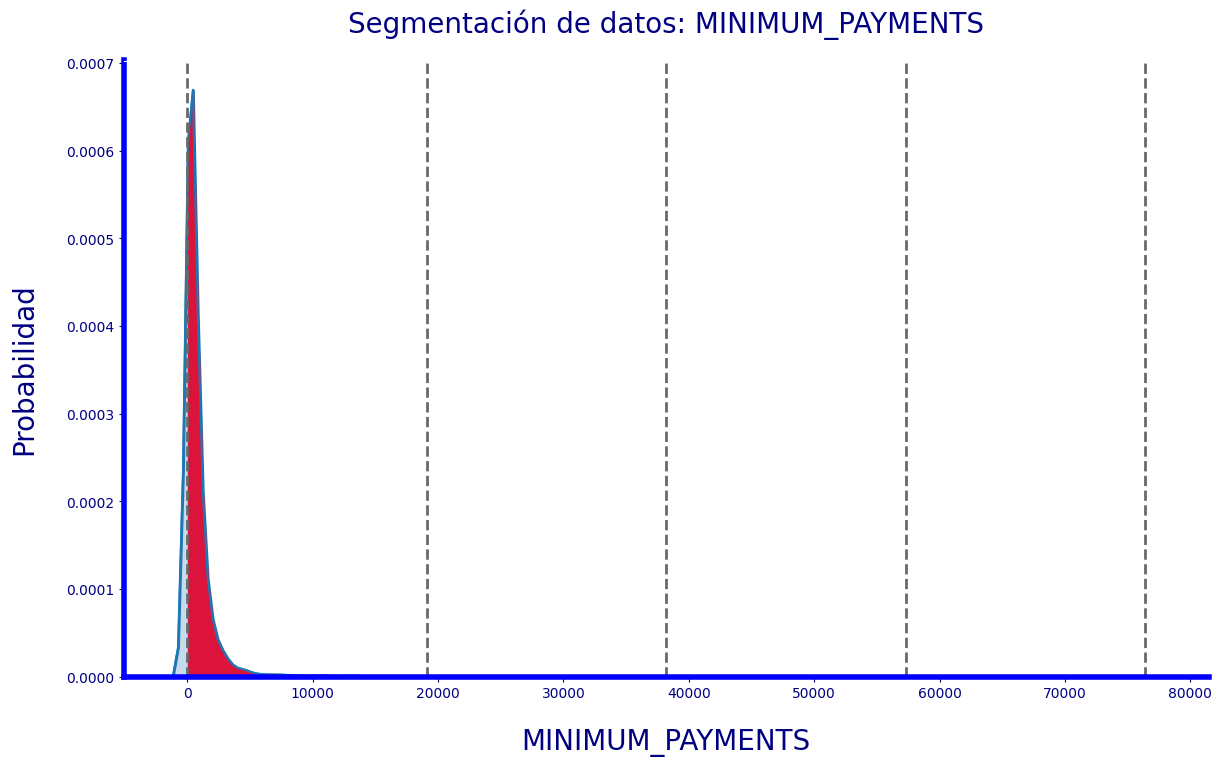



 Área bajo la curva de MINIMUM_PAYMENTS entre 0.0 y 19101.6: 0.7704
 Área bajo la curva de MINIMUM_PAYMENTS entre 19101.6 y 38203.1: 0.0020
 Área bajo la curva de MINIMUM_PAYMENTS entre 38203.1 y 57304.7: 0.0005
 Área bajo la curva de MINIMUM_PAYMENTS entre 57304.7 y 76406.2: 0.0002







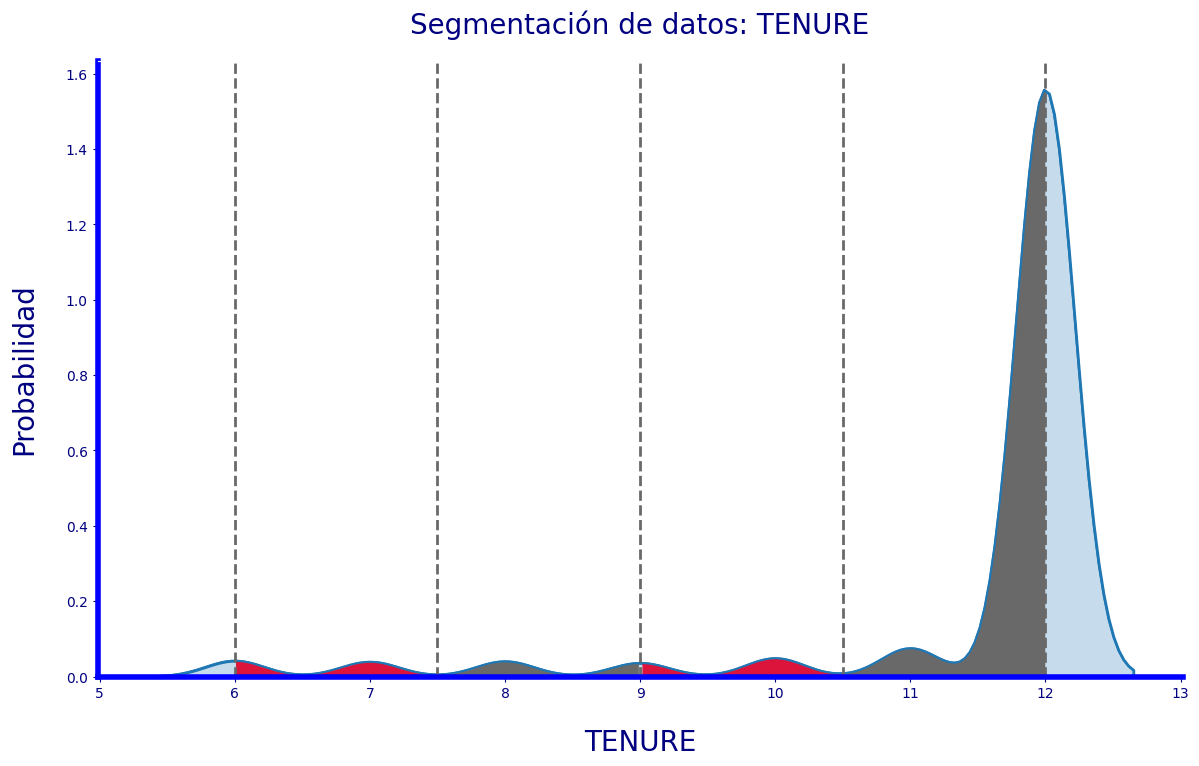



 Área bajo la curva de TENURE entre 6.0 y 7.5: 0.0321
 Área bajo la curva de TENURE entre 7.5 y 9.0: 0.0309
 Área bajo la curva de TENURE entre 9.0 y 10.5: 0.0355
 Área bajo la curva de TENURE entre 10.5 y 12.0: 0.4489







In [13]:
# Dividir el diagrama de densidad en secciones específicas

n_columns = ["BALANCE", "PURCHASES", "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES", "CASH_ADVANCE",
             "CASH_ADVANCE_TRX", "PURCHASES_TRX", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "TENURE"]

# Recorrer cada columna numérica
for i in n_columns:
    plt.figure(figsize=(14, 8))

    # Graficar curva de densidad con relleno
    sns.kdeplot(df[i], linewidth=2, fill=True)
    ax = sns.kdeplot(df[i])

    # Obtener los datos de la curva de densidad (última línea)
    kde_lines = ax.get_lines()[-1]
    kde_x, kde_y = kde_lines.get_data()

    # Dividir el rango de valores en 4 segmentos iguales
    rango_min = df[i].min()
    rango_max = df[i].max()
    intervalo = (rango_max - rango_min) / 4

    # Crear máscaras para cada segmento
    mask1 = (kde_x >= rango_min) & (kde_x < rango_min + intervalo)
    mask2 = (kde_x >= rango_min + intervalo) & (kde_x < rango_min + intervalo * 2)
    mask3 = (kde_x >= rango_min + intervalo * 2) & (kde_x < rango_min + intervalo * 3)
    mask4 = (kde_x >= rango_min + intervalo * 3) & (kde_x <= rango_max)

    # Filtrar los valores que caen en cada segmento
    filled_1_x, filled_1_y = kde_x[mask1], kde_y[mask1]
    filled_2_x, filled_2_y = kde_x[mask2], kde_y[mask2]
    filled_3_x, filled_3_y = kde_x[mask3], kde_y[mask3]
    filled_4_x, filled_4_y = kde_x[mask4], kde_y[mask4]

    # Rellenar cada región del gráfico con color
    ax.fill_between(filled_1_x, y1=filled_1_y, color="crimson")
    ax.fill_between(filled_2_x, y1=filled_2_y, color="dimgray")
    ax.fill_between(filled_3_x, y1=filled_3_y, color="crimson")
    ax.fill_between(filled_4_x, y1=filled_4_y, color="dimgray")

    # Líneas verticales divisorias
    plt.axvline(x=rango_min, linestyle='--', linewidth=2, color="DimGray")
    plt.axvline(x=rango_min + intervalo, linestyle='--', linewidth=2, color="DimGray")
    plt.axvline(x=rango_min + intervalo * 2, linestyle='--', linewidth=2, color="DimGray")
    plt.axvline(x=rango_min + intervalo * 3, linestyle='--', linewidth=2, color="DimGray")
    plt.axvline(x=rango_max, linestyle='--', linewidth=2, color="DimGray")

    # Título y etiquetas del gráfico
    plt.title("Segmentación de datos: " + i, pad=20, size=20, color="navy")
    plt.xlabel(f"{i}", labelpad=20, size=20)
    plt.ylabel("Probabilidad", labelpad=20, size=20)

    # Personalización de bordes
    ax.spines['bottom'].set_color('blue')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('blue')
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)

    ax.xaxis.label.set_color('navy')
    ax.yaxis.label.set_color('navy')
    ax.tick_params(colors="navy", which='both')

    plt.show()

    # Calcular el área bajo la curva en cada segmento
    area1 = np.trapz(filled_1_y, filled_1_x)
    area2 = np.trapz(filled_2_y, filled_2_x)
    area3 = np.trapz(filled_3_y, filled_3_x)
    area4 = np.trapz(filled_4_y, filled_4_x)

    # Imprimir los resultados
    from colorama import Fore
    print('\n')
    print(Fore.BLUE, f"Área bajo la curva de {i} entre {rango_min:.1f} y {(rango_min + intervalo):.1f}: {area1:.4f}")
    print(Fore.RED, f"Área bajo la curva de {i} entre {(rango_min + intervalo):.1f} y {(rango_min + intervalo * 2):.1f}: {area2:.4f}")
    print(Fore.BLUE, f"Área bajo la curva de {i} entre {(rango_min + intervalo * 2):.1f} y {(rango_min + intervalo * 3):.1f}: {area3:.4f}")
    print(Fore.RED, f"Área bajo la curva de {i} entre {(rango_min + intervalo * 3):.1f} y {rango_max:.1f}: {area4:.4f}")
    print('\n\n\n\n')


Se realizó un análisis de segmentación de las variables financieras clave dividiendo la distribución de cada una en cuatro segmentos de igual tamaño en su rango de valores. Para cada segmento, se calculó el área bajo la curva de densidad, lo que permitió identificar los rangos de valores con mayor concentración de datos. Por ejemplo, en la variable 'BALANCE', se observa que la mayoría de los valores se concentran en el segundo y tercer segmento, sugiriendo que los clientes suelen mantener balances en un rango medio. En contraste, variables como 'CASH_ADVANCE' muestran una mayor dispersión con áreas significativas en los extremos, indicando una mayor variabilidad en su comportamiento. Estos insights pueden usarse para categorizar clientes o establecer límites operativos basados en segmentos estadísticamente relevantes.

### Credit Limit vs. Balance based on Tenure

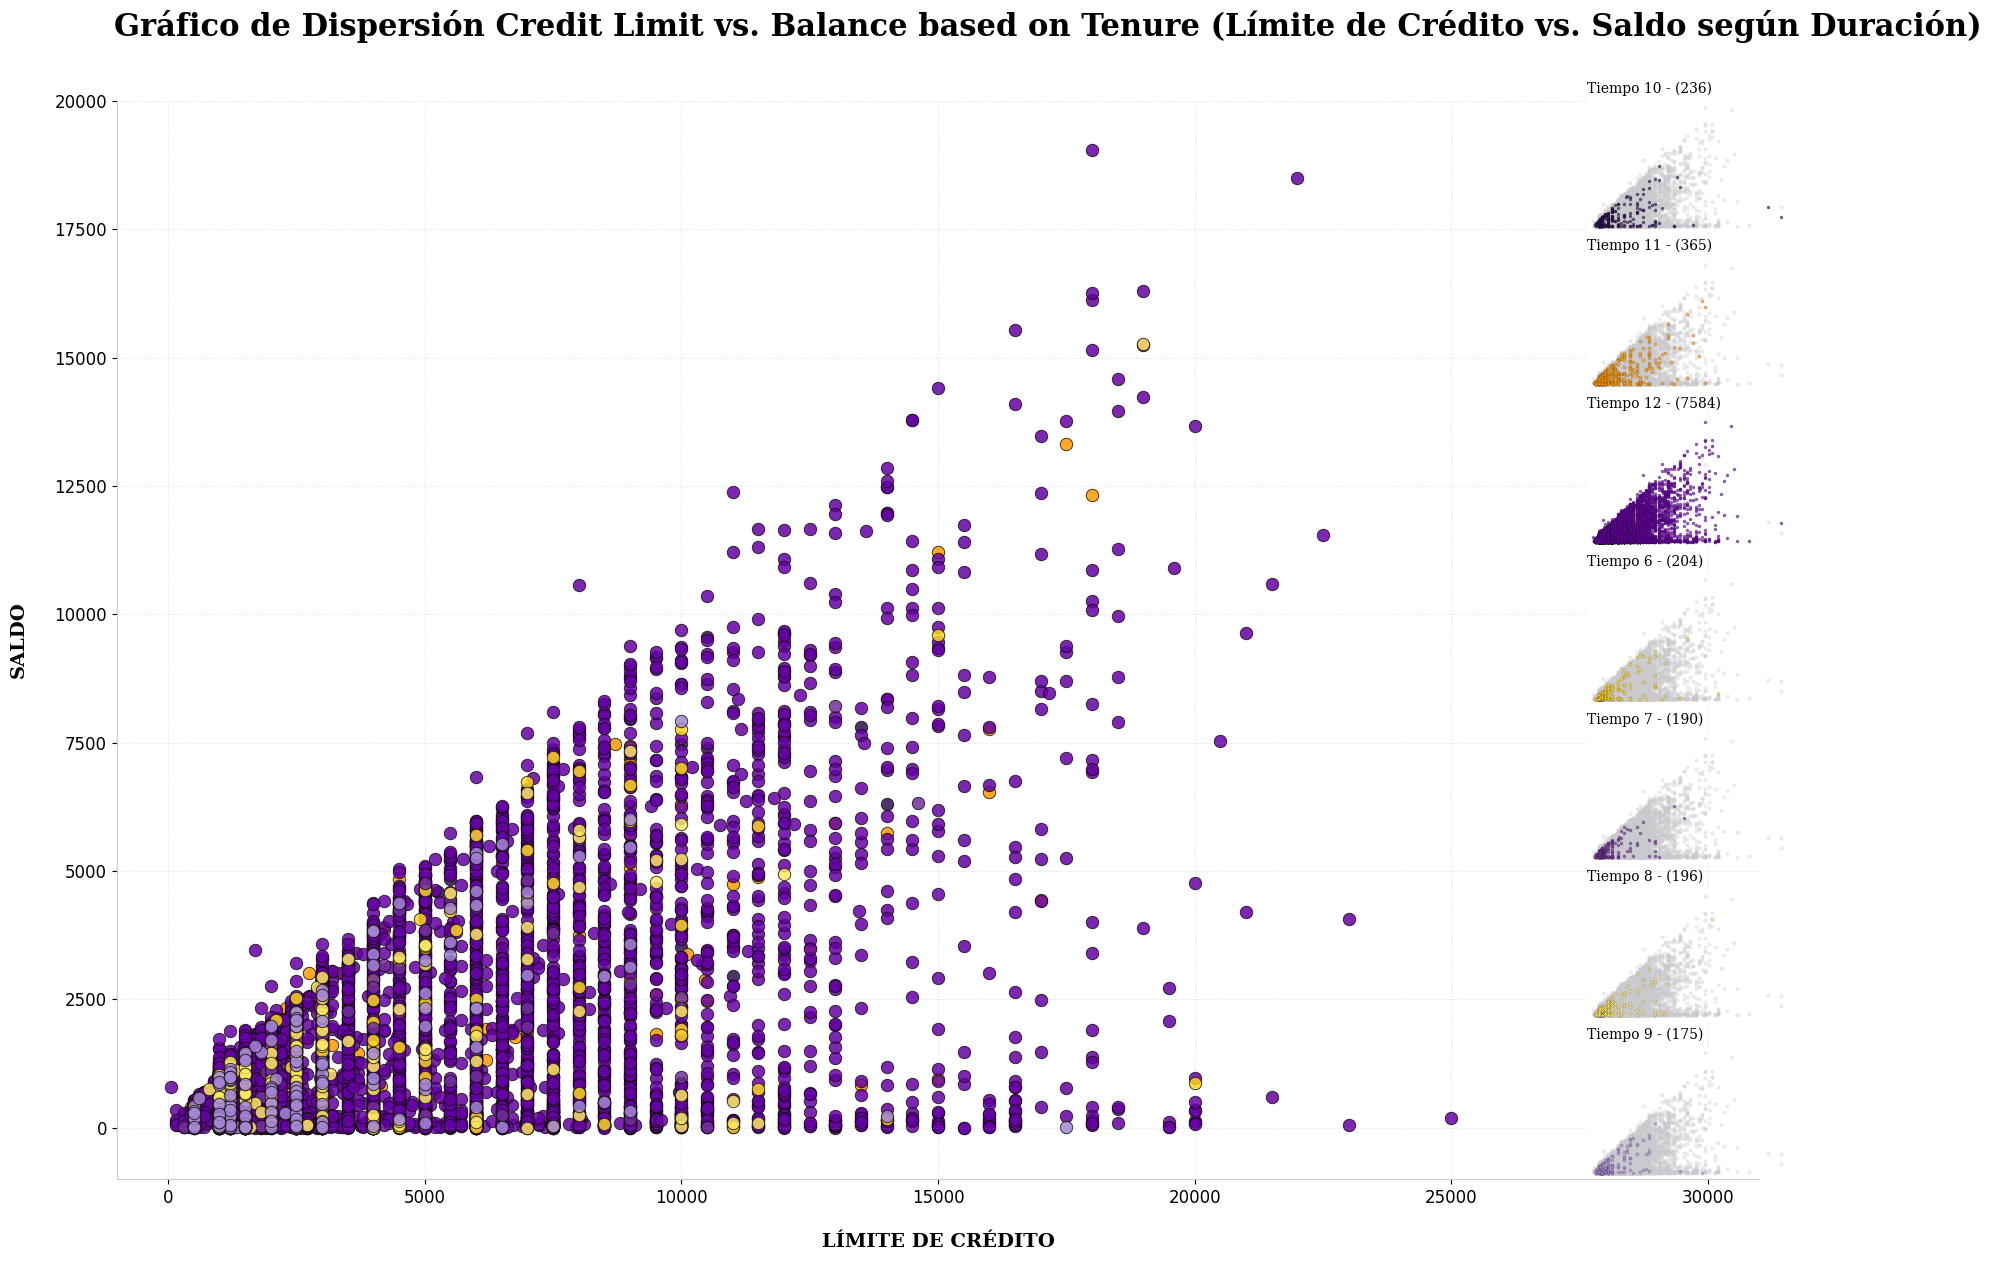

In [14]:
# --- EDA 1 Variables ---
estilo_dispersion = dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
estilo_sub_dispersion_color = dict(s=5, alpha=0.65, linewidth=0.15, zorder=10, edgecolor='#100C07')
estilo_sub_dispersion_gris = dict(s=5, alpha=0.3, linewidth=0.7, zorder=5, color='#CAC9CD')
estilo_rejilla = dict(alpha=0.3, color='#9B9A9C', linestyle='dotted', zorder=1)
etiquetas_xy = dict(fontweight='bold', fontsize=14, fontfamily='serif')
super_titulo = dict(fontsize=22, fontweight='heavy', fontfamily='serif')
titulo = dict(fontsize=16, fontfamily='serif')
paleta_colores = ['#2D0F51', '#FF9A00', '#6600A5', '#FFD61E', '#722E9A', '#FFE863', '#A486D5']
sub_graficos = [None] * 7

# --- EDA 1 Data Frame ---
eda1 = df[['CREDIT_LIMIT', 'BALANCE', 'TENURE']]
eda1['TENURE'] = eda1['TENURE'].astype(str)
tenure = sorted(eda1['TENURE'].unique())

# --- EDA 1 Configuración del gráfico ---
fig = plt.figure(figsize=(22, 14))
gs = fig.add_gridspec(7, 7)
ax = fig.add_subplot(gs[:, :7])
ax.set_aspect(1)

# --- EDA 1: Gráfico de dispersión principal ---
for x in range(len(tenure)):
    eda1_x = eda1[eda1['TENURE'] == tenure[x]]
    ax.scatter(eda1_x['CREDIT_LIMIT'], eda1_x['BALANCE'], s=80, color=paleta_colores[x], **estilo_dispersion)
    ax.set_xlabel('\nLÍMITE DE CRÉDITO', **etiquetas_xy)
    ax.set_ylabel('SALDO\n', **etiquetas_xy)
    ax.grid(axis='y', which='major', **estilo_rejilla)
    ax.grid(axis='x', which='major', **estilo_rejilla)
    for spine in ax.spines.values():
        spine.set_color('None')
    for spine in ['bottom', 'left']:
        ax.spines[spine].set_visible(True)
        ax.spines[spine].set_color('#CAC9CD')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

# --- EDA 1: Subgráficos por duración (Tenure) ---
for idx, tnr in enumerate(tenure):
    sub_graficos[idx] = fig.add_subplot(gs[idx, 6], aspect=1)
    
    sub_graficos[idx].scatter(
        eda1[eda1['TENURE'] != tnr]['CREDIT_LIMIT'],
        eda1[eda1['TENURE'] != tnr]['BALANCE'],
        label=tnr, **estilo_sub_dispersion_gris
    )
    sub_graficos[idx].scatter(
        eda1[eda1['TENURE'] == tnr]['CREDIT_LIMIT'],
        eda1[eda1['TENURE'] == tnr]['BALANCE'],
        color=paleta_colores[idx], label=tnr, **estilo_sub_dispersion_color
    )
    
    cnt = (eda1['TENURE'] == tnr).sum()
    sub_graficos[idx].set_title(f'Tiempo {tnr} - ({cnt})', loc='left', fontsize=10, fontfamily='serif')
    sub_graficos[idx].set_xticks([])
    sub_graficos[idx].set_yticks([])
    for spine in sub_graficos[idx].spines.values():
        spine.set_color('None')

# --- EDA 1: Límites de los ejes X e Y ---
for ejes in [ax] + sub_graficos:
    ejes.set_xlim(-1000, 31000)
    ejes.set_ylim(-1000, 20000)

# --- EDA 1: Título general ---
plt.suptitle('Gráfico de Dispersión Credit Limit vs. Balance based on Tenure (Límite de Crédito vs. Saldo según Duración)', 
             x=0.138, y=0.945, ha='left', **super_titulo)
plt.show()


El gráfico de dispersión revela que a medida que aumentan los valores de la variable, también se incrementa la varianza de los residuos/distribución, formando una figura cónica. Además, la mayoría de los clientes de tarjetas de crédito prefieren un periodo de permanencia de 12 meses.

### Purchases Amount vs. Total Transaction

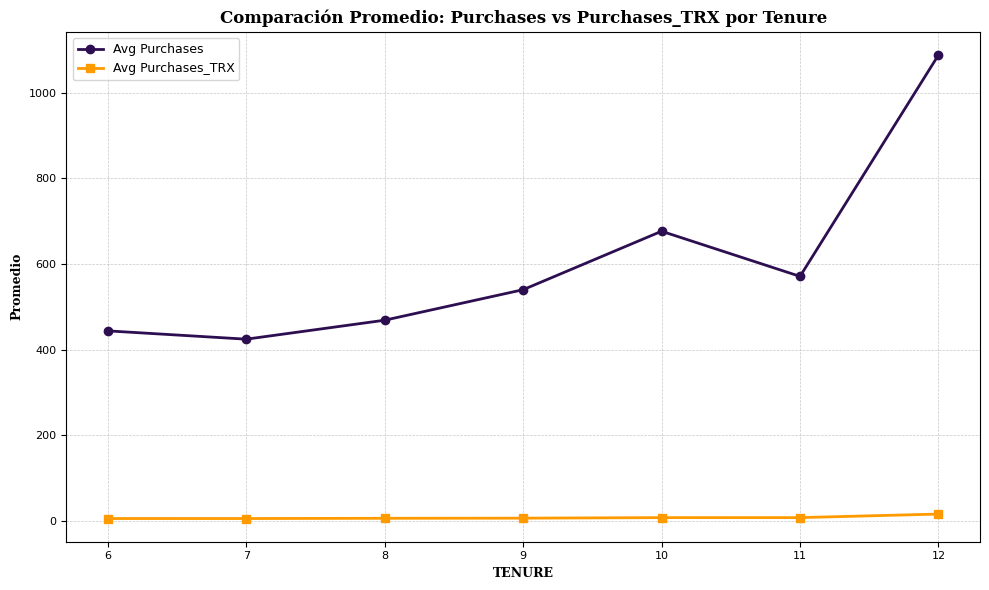

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que ya tienes cargado tu DataFrame `df`
# Aquí creamos los DataFrames agrupados necesarios:

eda2_1 = df[['PURCHASES', 'TENURE']].groupby('TENURE').agg(
    MIN=('PURCHASES', 'min'),
    AVG=('PURCHASES', 'mean'),
    MAX=('PURCHASES', 'max')
).reset_index()

eda2_2 = df[['PURCHASES_TRX', 'TENURE']].groupby('TENURE').agg(
    MIN=('PURCHASES_TRX', 'min'),
    AVG=('PURCHASES_TRX', 'mean'),
    MAX=('PURCHASES_TRX', 'max')
).reset_index()

# Configuraciones de estilo
xy_label = dict(fontweight='bold', fontsize=9, fontfamily='serif')
tenure = sorted(df['TENURE'].unique())

# --- NUEVO GRÁFICO: Líneas comparativas de AVG por TENURE ---
plt.figure(figsize=(10, 6))
plt.title('Comparación Promedio: Purchases vs Purchases_TRX por Tenure', fontsize=12, fontweight='bold', fontfamily='serif')

# Línea para PURCHASES
plt.plot(eda2_1['TENURE'], eda2_1['AVG'], label='Avg Purchases', marker='o', color='#2D0F51', linewidth=2)

# Línea para PURCHASES_TRX
plt.plot(eda2_2['TENURE'], eda2_2['AVG'], label='Avg Purchases_TRX', marker='s', color='#FF9A00', linewidth=2)

# Estética
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('TENURE', **xy_label)
plt.ylabel('Promedio', **xy_label)
plt.xticks(ticks=tenure, fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()


El gráfico de líneas indica que los clientes con 12 meses de antigüedad presentan los promedios más altos en compras y transacciones, lo que sugiere un mayor uso de la tarjeta con el tiempo. También se observan casos donde algunos clientes no realizan transacciones, posiblemente para mantener un alto límite de crédito y mejorar su puntaje.

Además, se evidencian contrastes entre clientes con tenures similares: los de 10 meses compran más que los de 11, pero hacen menos transacciones; mientras que los de 7 meses compran menos que los de 8, pero realizan más transacciones. Esto refleja distintos patrones de uso según la duración de la relación.

### Credit Limit vs. Installment Purchases

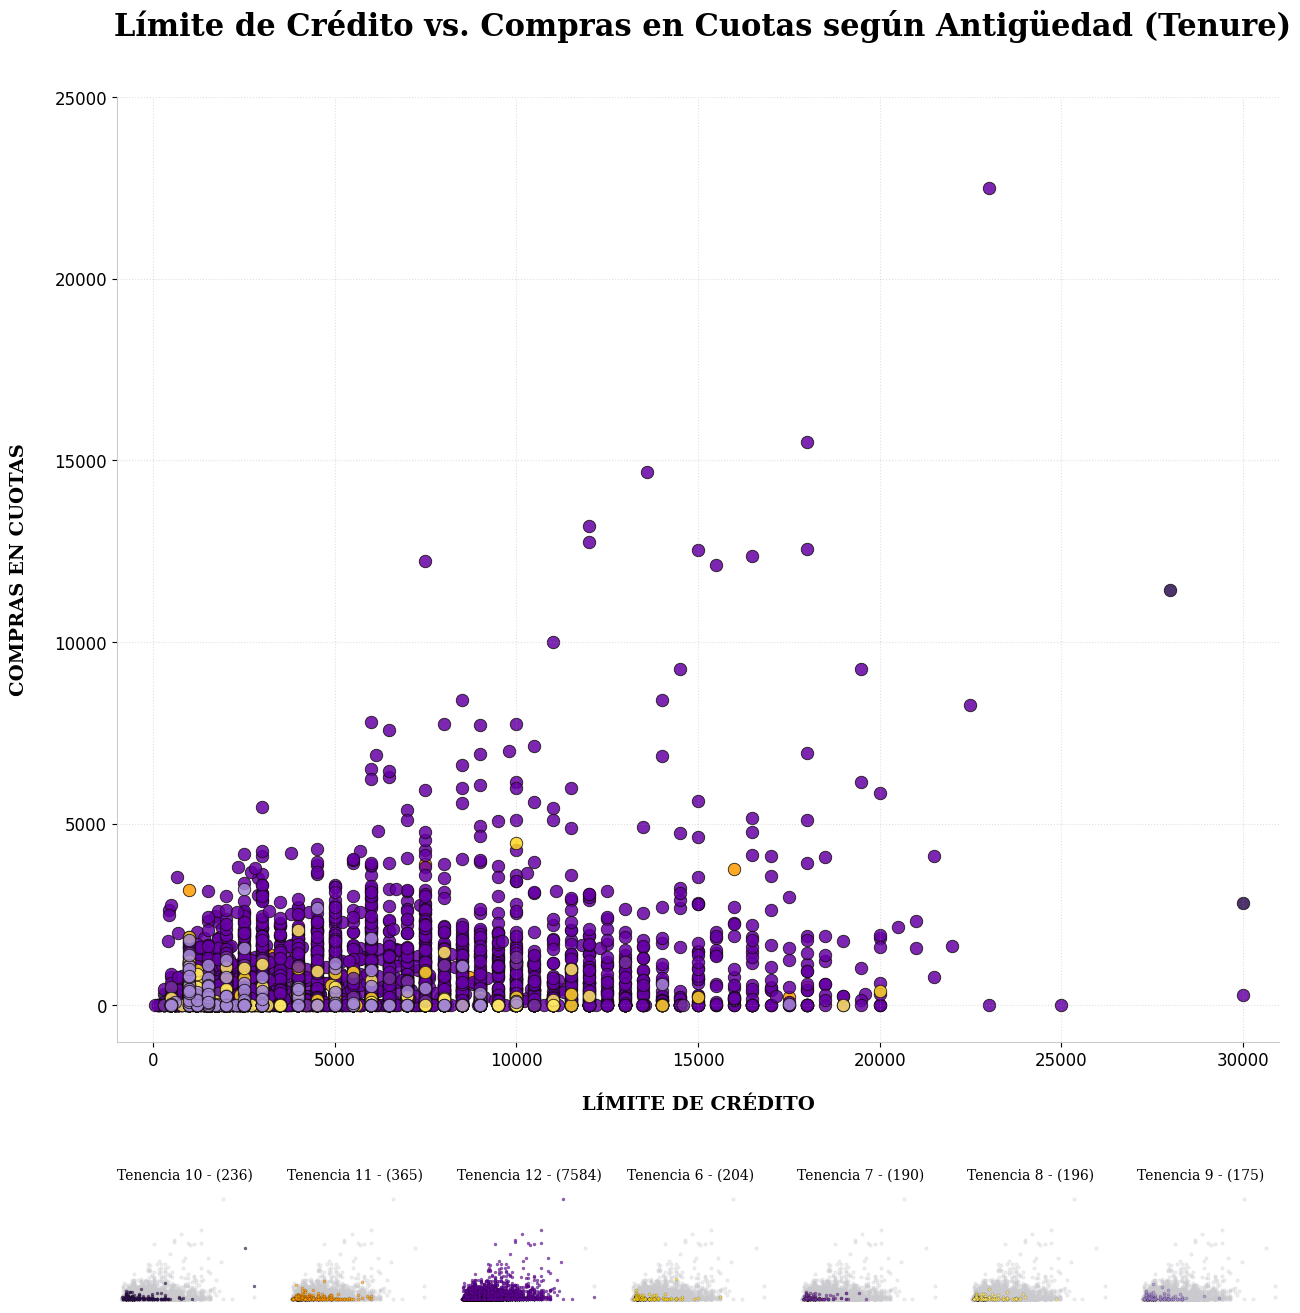

In [16]:
# --- EDA 3 Variables ---
estilo_dispersion = dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
estilo_dispersion_sub_color = dict(s=5, alpha=0.65, linewidth=0.15, zorder=10, edgecolor='#100C07')
estilo_dispersion_sub_gris = dict(s=5, alpha=0.3, linewidth=0.7, zorder=5, color='#CAC9CD')
estilo_cuadricula = dict(alpha=0.3, color='#9B9A9C', linestyle='dotted', zorder=1)
etiquetas_xy = dict(fontweight='bold', fontsize=14, fontfamily='serif')
estilo_titulo_general = dict(fontsize=22, fontweight='heavy', fontfamily='serif')
estilo_titulo = dict(fontsize=16, fontfamily='serif')
paleta_colores = ['#2D0F51', '#FF9A00', '#6600A5', '#FFD61E', '#722E9A', '#FFE863', '#A486D5']
sub_graficos = [None] * 7

# --- EDA 3 DataFrame ---
eda3 = df[['CREDIT_LIMIT', 'INSTALLMENTS_PURCHASES', 'TENURE']]
eda3['TENURE'] = eda1['TENURE'].astype(str)
tenure = sorted(eda1['TENURE'].unique())

# --- EDA 3 Configuración del gráfico principal ---
fig = plt.figure(figsize=(15, 20))
gs = fig.add_gridspec(7, 7)
ax = fig.add_subplot(gs[:7, :])
ax.set_aspect(1)

# --- EDA 3: Gráfico de dispersión principal ---
for x in range(len(tenure)):
    eda3_x = eda3[eda3['TENURE'] == tenure[x]]
    ax.scatter(eda3_x['CREDIT_LIMIT'], eda3_x['INSTALLMENTS_PURCHASES'], s=80, color=paleta_colores[x], **estilo_dispersion)
    ax.set_xlabel('\nLÍMITE DE CRÉDITO', **etiquetas_xy)
    ax.set_ylabel('COMPRAS EN CUOTAS\n', **etiquetas_xy)
    ax.grid(axis='y', which='major', **estilo_cuadricula)
    ax.grid(axis='x', which='major', **estilo_cuadricula)
    for spine in ax.spines.values():
        spine.set_color('None')
    for spine in ['bottom', 'left']:
        ax.spines[spine].set_visible(True)
        ax.spines[spine].set_color('#CAC9CD')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

# --- EDA 3: Subgráficos por tenure ---
for idx, tnr in enumerate(tenure):
    sub_graficos[idx] = fig.add_subplot(gs[6, idx], aspect=1)
    
    sub_graficos[idx].scatter(
        eda3[eda3['TENURE'] != tnr]['CREDIT_LIMIT'],
        eda3[eda3['TENURE'] != tnr]['INSTALLMENTS_PURCHASES'],
        label=tnr,
        **estilo_dispersion_sub_gris
    )
    sub_graficos[idx].scatter(
        eda3[eda3['TENURE'] == tnr]['CREDIT_LIMIT'],
        eda3[eda3['TENURE'] == tnr]['INSTALLMENTS_PURCHASES'],
        color=paleta_colores[idx],
        label=tnr,
        **estilo_dispersion_sub_color
    )
    
    cnt = (eda3['TENURE'] == tnr).sum()
    sub_graficos[idx].set_title(f'Tenencia {tnr} - ({cnt})', loc='left', fontsize=10, fontfamily='serif')
    sub_graficos[idx].set_xticks([])
    sub_graficos[idx].set_yticks([])
    for spine in sub_graficos[idx].spines.values():
        spine.set_color('None')

# --- EDA 3: Límites de los ejes XY ---
for ejes in [ax] + sub_graficos:
    ejes.set_xlim(-1000, 31000)
    ejes.set_ylim(-1000, 25000)

# --- EDA 3: Título general del gráfico ---
plt.suptitle('Límite de Crédito vs. Compras en Cuotas según Antigüedad (Tenure)', x=0.123, y=0.775, ha='left', **estilo_titulo_general)
plt.show()


El gráfico de dispersión indica que no existe una relación clara entre las dos variables analizadas. Esto se debe a que los puntos se encuentran distribuidos sin seguir un patrón definido, lo que sugiere que los cambios en una variable no afectan de manera consistente a la otra. En otras palabras, no hay evidencia visual de correlación positiva ni negativa.

<Axes: >

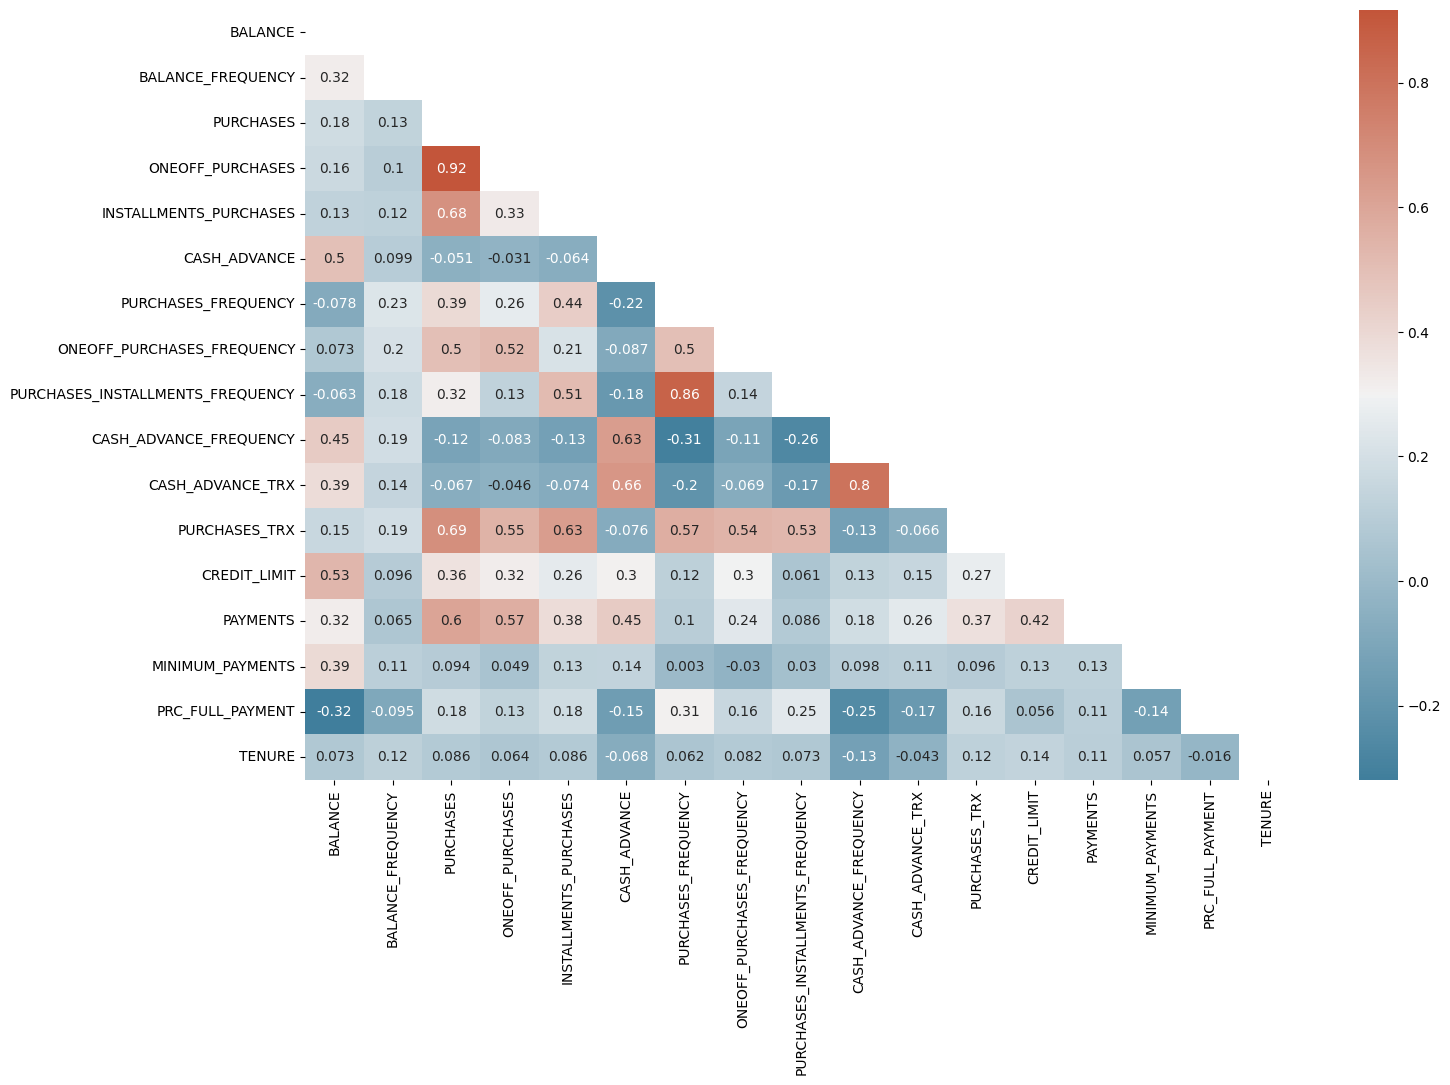

In [17]:
corr = df.corr()

f, ax = plt.subplots(figsize=(16, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

En este gráfico se muestra la matriz de correlación entre todas las variables del dataset. Se ha utilizado un mapa de calor con anotaciones para visualizar qué tan relacionadas están entre sí las variables.

- Se aplica una máscara triangular para evitar la duplicación de valores, ya que la matriz es simétrica.
- El colormap divergente permite identificar con claridad las correlaciones negativas (colores fríos) y positivas (colores cálidos).
- Las anotaciones (`annot=True`) muestran el valor exacto de correlación entre cada par de variables.

Este tipo de visualización es útil como análisis exploratorio inicial, ya que permite identificar rápidamente relaciones fuertes (positivas o negativas) que pueden ser relevantes para análisis posteriores, como selección de variables, reducción de dimensionalidad o interpretación de resultados.

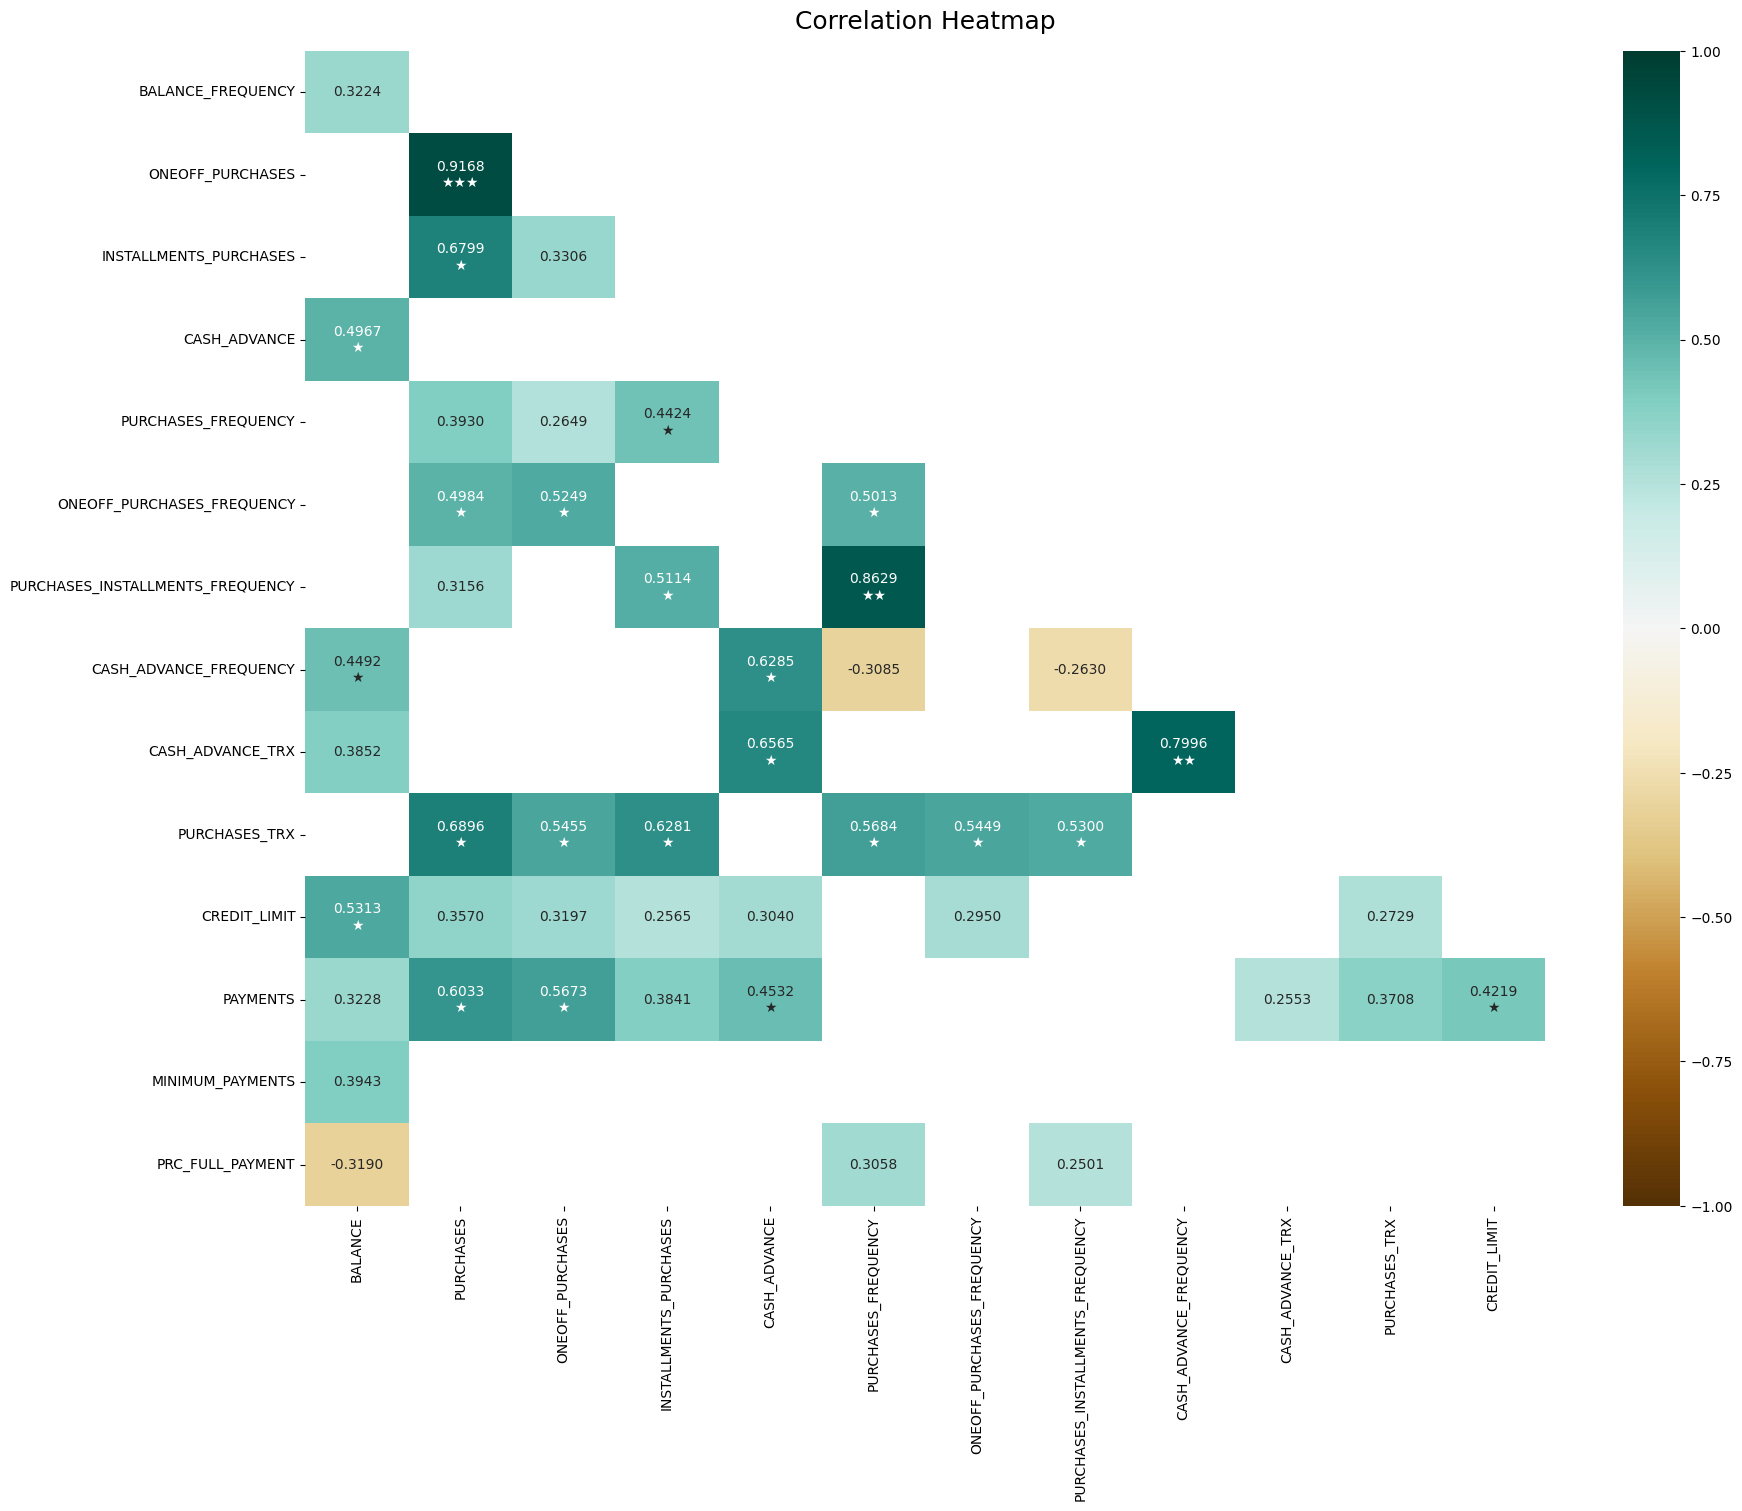

In [18]:
corr = df.corr()

f, ax = plt.subplots(figsize=(20, 15))

mask = np.triu(np.ones_like(corr, dtype=bool))

cut_off = 0.25  # only show cells with abs(correlation) at least this value
extreme_1 = 0.4 # show with a star
extreme_2 = 0.75  # show with a second star
extreme_3 = 0.9  # show with a third star
mask |= np.abs(corr) < cut_off
corr = corr[~mask]  # fill in NaN in the non-desired cells

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n★')  
          + ('' if abs(val) < extreme_2 else '★')  
          + ('' if abs(val) < extreme_3 else '★') 
          for val in row] for row in corr.to_numpy()]
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)
plt.show()

Este gráfico muestra una versión refinada de la matriz de correlación, en la que solo se incluyen las correlaciones con una magnitud igual o superior a 0.25. Además, se han agregado indicadores visuales (★) para destacar la intensidad de cada correlación:

- ⭐ para correlaciones con valor absoluto mayor a 0.40
- ⭐⭐ para correlaciones mayores a 0.75
- ⭐⭐⭐ para correlaciones muy altas, mayores a 0.90

El objetivo de este enfoque es enfocar el análisis en las relaciones más significativas, eliminando valores irrelevantes que podrían dificultar la interpretación.

También se eliminaron filas y columnas sin valores relevantes para mejorar la claridad del gráfico.

Este tipo de visualización es ideal cuando se quiere:
- Identificar variables altamente relacionadas que podrían estar capturando la misma información.
- Detectar posibles problemas de colinealidad.
- Seleccionar variables clave para modelos predictivos o descriptivos.

# Preprocesamiento

- Escalar las variables numéricas.

In [19]:
print(df.columns)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


In [20]:
X = df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
X.shape

(8950, 17)

# Implementación de Clustering

Previo a la aplicación del algoritmo K-Means, es necesario identificar cuántos clústeres son los más adecuados, para lo cual se empleará la técnica del codo.

In [22]:
# Kmeans algorithm settings
kmeans_set = {"init":"random", "n_init":10, "max_iter":300, "random_state":42}
# Find inertia for k cluster
inertias = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

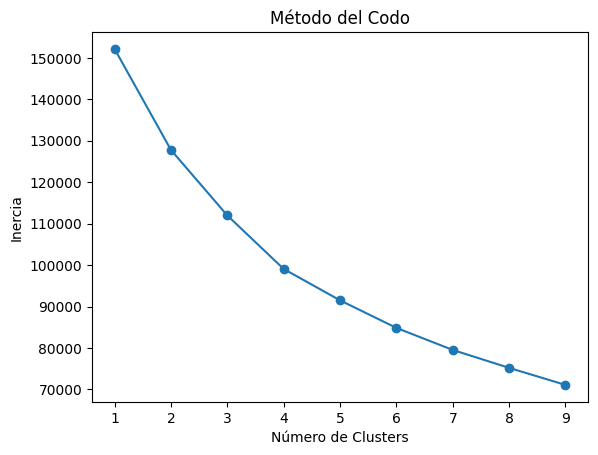

In [23]:
plt.plot(range(1, 10), inertias, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

A partir del análisis realizado con el método del codo, se determina que la cantidad ideal de clústeres para K-Means es 4. A continuación, se utilizará este número óptimo para crear los clústeres, se generarán visualizaciones de su distribución y se emplearán gráficos de silueta para medir su efectividad.

In [61]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=500)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

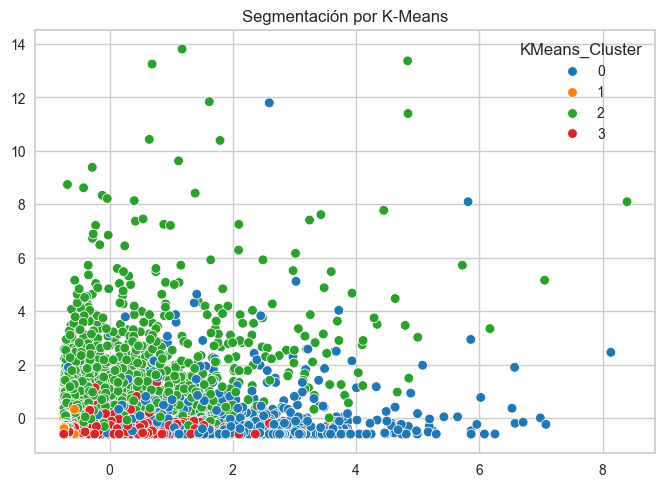

In [89]:
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 11], hue=df['KMeans_Cluster'], palette='tab10')
plt.title('Segmentación por K-Means')
plt.show()

In [98]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

silhouette = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(X_scaled)
    S_score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette.append(S_score)

calinski_harabasz = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(X_scaled)
    C_score = calinski_harabasz_score(X_scaled, kmeans.labels_)
    calinski_harabasz.append(C_score)

davies_bouldin = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(X_scaled)
    D_score = davies_bouldin_score(X_scaled, kmeans.labels_)
    davies_bouldin.append(D_score)